In [1]:
import json
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from csv import reader
import numpy as np
import random
import pandas as pd
import plotly.offline as py
import networkx as nx
import random
from mpl_toolkits.mplot3d import Axes3D


Definisco i nodi

In [2]:

def load_nodes(path_nodes='graph_nodes.csv'):
    lista_nodi = dict()
    with open(path_nodes, 'r') as read_obj:
        csv_reader = reader(read_obj)
        header = next(csv_reader)
        # Check file as empty
        if header is not None:
            # Iterate over each row after the header in the csv
            for row in csv_reader:
                # row variable is a list that represents a row in csv
                lista_nodi[row[0]] = row[1]

    print("Numero nodi da rappresentare")
    print(len(lista_nodi))
    return lista_nodi

lista_nodi = load_nodes()
lista_nodi

Numero nodi da rappresentare
43


{'1': 'King Harald Fair-Hair',
 '2': 'Halfdan the Black',
 '3': 'Gudrod the Hunting King',
 '4': 'Halfdan the Mild and Meal-stingy',
 '5': 'Eystein Fart',
 '6': 'Olaf Wood-carver',
 '7': 'Hallfred',
 '8': 'Wife of Hallfred',
 '9': 'Hrafnkel',
 '10': 'Arnthrud',
 '11': 'man',
 '12': 'Oddbjorg Skjoldalfsdottir',
 '13': 'Thorir',
 '14': 'Asbjorn',
 '15': 'Frey',
 '16': 'Bjarni',
 '17': "Bjarni's wife",
 '18': 'Sam',
 '19': 'Eyvind',
 '20': "Sam's wife",
 '21': 'king of Greeks',
 '22': 'Freyfaxi',
 '23': 'Thorbjorn',
 '24': 'Einar',
 '25': 'shepherds',
 '26': 'mealtime servant',
 '27': 'milking women',
 '28': 'new shepherd',
 '29': 'Thorkel',
 '30': 'Thjostar',
 '31': 'Thorgeir',
 '32': 'Thormod',
 '33': 'Thordis',
 '34': 'Thorolf Skallagrimson',
 '35': "Eyvind's servant boy",
 '36': 'Servant woman',
 '37': 'Sighvat',
 '38': 'Snorri',
 '39': 'Hallstein',
 '40': 'Hrolf',
 '41': 'Thord ',
 '42': 'Halli',
 '43': 'Housekeeper'}

Carico gli archi

In [3]:
def load_edges(path_edges="graph.json"):
    with open(path_edges) as json_file:
        graph = json.load(json_file)

    lista_archi = list()
    for arco in graph["links"]:
        lista_archi.append((arco["source"], arco["target"]))

    print("Archi da rappresentare")
    print(len(lista_archi))
    return lista_archi


lista_archi = load_edges()
lista_archi

Archi da rappresentare
110


[('1', '2'),
 ('2', '3'),
 ('3', '4'),
 ('4', '5'),
 ('5', '6'),
 ('7', '9'),
 ('8', '7'),
 ('9', '7'),
 ('9', '7'),
 ('9', '8'),
 ('9', '9'),
 ('9', '13'),
 ('9', '14'),
 ('9', '15'),
 ('9', '18'),
 ('9', '18'),
 ('9', '18'),
 ('9', '19'),
 ('9', '19'),
 ('9', '22'),
 ('9', '22'),
 ('9', '23'),
 ('9', '24'),
 ('9', '24'),
 ('9', '24'),
 ('9', '24'),
 ('9', '26'),
 ('9', '26'),
 ('9', '29'),
 ('9', '37'),
 ('9', '38'),
 ('9', '41'),
 ('9', '42'),
 ('10', '7'),
 ('10', '7'),
 ('11', '7'),
 ('12', '9'),
 ('13', '9'),
 ('13', '12'),
 ('14', '9'),
 ('14', '12'),
 ('17', '16'),
 ('18', '9'),
 ('18', '9'),
 ('18', '9'),
 ('18', '9'),
 ('18', '9'),
 ('18', '9'),
 ('18', '9'),
 ('18', '9'),
 ('18', '16'),
 ('18', '17'),
 ('18', '19'),
 ('18', '19'),
 ('18', '21'),
 ('18', '23'),
 ('18', '23'),
 ('18', '29'),
 ('18', '29'),
 ('18', '31'),
 ('18', '31'),
 ('18', '31'),
 ('18', '31'),
 ('18', '31'),
 ('19', '16'),
 ('19', '17'),
 ('19', '21'),
 ('19', '35'),
 ('20', '18'),
 ('23', '9'),
 ('23', '

In [4]:
Num_nodes = 43

def load_nodes_label(path_nodes="graph.json"):
    graph = None
    with open(path_nodes) as json_file:
        graph = json.load(json_file)

    node_labels = dict()
    for node in graph["nodes"]:
        node_labels[(node['id'])] = node['label']

    print("Numero di label dei nodi da rappresentare")
    print(len(node_labels))

    return node_labels

lista_label = load_nodes_label()

lista_label

graph = None
with open("graph.json") as json_file:
    graph = json.load(json_file)

    node_labels = list()
    for node in graph["nodes"]:
        node_labels.append(node['label'])



Numero di label dei nodi da rappresentare
43


In [5]:
def load_edges_label(path_edges="graph.json"):
    with open(path_edges) as json_file:
        graph = json.load(json_file)

    lista_label_archi = list()
    for arco in graph["links"]:
        lista_label_archi.append(arco["action_description"])

    print("Label archi da rappresentare")
    print(len(lista_archi))
    return lista_label_archi


lista_label_archi = load_edges_label()
print(len(lista_label_archi))
lista_label_archi

Label archi da rappresentare
110
110


['descent',
 'descent',
 'descent',
 'descent',
 'descent',
 'offer assistance',
 'marriage',
 'descent',
 'request assistance',
 'descent',
 'death_neutral',
 'inheritance',
 'inheritance',
 'offer assistance',
 'placed in command',
 'challenge',
 'conversation_neutral',
 'hostility_non-lethal',
 'hostility_lethal',
 'provide information',
 'ownership',
 'intervention',
 'death_neutral',
 'hostility_lethal',
 'hostility_lethal',
 'accusation',
 'request assistance',
 'request assistance',
 'request assistance',
 'summons',
 'summons',
 'summons',
 'summons',
 'offer assistance',
 'death_neutral',
 'provide information',
 'marriage',
 'descent',
 'descent',
 'descent',
 'descent',
 'marriage',
 'conversation_neutral',
 'hostility_non-lethal',
 'hostility_non-lethal',
 'hostility_non-lethal',
 'accusation',
 'accusation',
 'summons',
 'insult',
 'descent',
 'descent',
 'invitation',
 'giftgiving',
 'request assistance',
 'placed in command',
 'giftgiving',
 'giftgiving',
 'giftgiving',


In [6]:

with open('graph.json') as json_file:
    graph = json.load(json_file)

maschi = list()
dizionario_maschi = dict()
femmine = list()
dizionario_femmine = dict()
neutri = list()
dizionario_neutri = dict()
lista_colori = list()

for node in graph["nodes"]:
    if int(node["gender"]) == 0:
        neutri.append(node["id"])
        dizionario_neutri[node["id"]] = node["label"]
        lista_colori.append('#ab3776')

    if int(node["gender"]) == 1:
        maschi.append(node["id"])
        dizionario_maschi[node["id"]] = node["label"]
        lista_colori.append('#3776ab')

    if int(node["gender"]) == 2:
        femmine.append(node['gender'])
        dizionario_femmine[node["id"]] = node["label"]
        lista_colori.append('#76ab37')

print(len(neutri) + len(maschi) + len(femmine))


43


Numero nodi da rappresentare:
43
-----------------------------
Numero archi da rappresentare:
110
Label archi da rappresentare
110
Numero nodi nel grafo:
43
-----------------------
Numero archi nel grafo:
110


<Figure size 432x288 with 0 Axes>

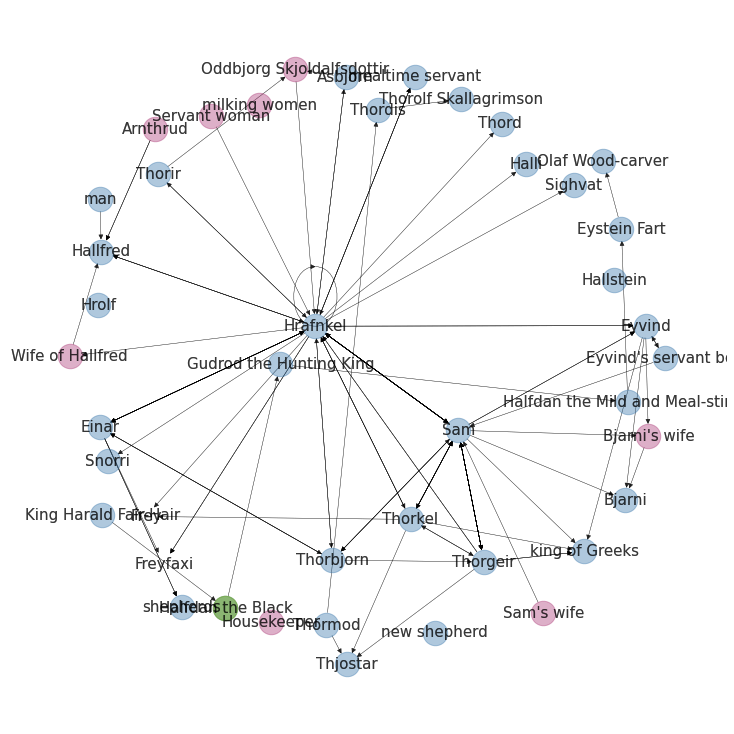

Numero nodi nel grafo:
43
-----------------------
Numero archi nel grafo:
110


In [7]:
G = nx.MultiDiGraph()

print("Numero nodi da rappresentare:")
print(len(lista_nodi))
print("-----------------------------")
print("Numero archi da rappresentare:")
print(len(lista_archi))



G.add_nodes_from(lista_nodi)
for nodo in lista_archi:
    G.add_edge(nodo[0], nodo[1], label= lista_label_archi.pop(0))


lista_label_archi = load_edges_label()
#G.add_weighted_edges_from(lista_archi)

print("Numero nodi nel grafo:")
print(G.number_of_nodes())
print("-----------------------")
print("Numero archi nel grafo:")
print(G.number_of_edges())

spiral = nx.spiral_layout(G, resolution=2.5)
spring_pos = nx.spring_layout(G, seed = 10,k = 0.5, pos = spiral)
kamada_pos = nx.kamada_kawai_layout(G, scale=1.2, pos = spring_pos)
spring_pos = nx.spring_layout(G, seed = 110, k = 3.5, pos = kamada_pos, scale=10, center=(0, 0))

plt.tight_layout()
plt.figure(3, figsize=(10, 10))

#Disegno nodi maschi
nx.draw(G, pos= spring_pos, with_labels=True,font_size=15,nodelist = maschi,node_color='#3776ab', node_size=600,alpha= 0.4,width= 0.4, labels= lista_label,arrowsize=10)

#Disegno nodi femmine
nx.draw(G, pos= spring_pos, with_labels=True,font_size=15,nodelist = femmine,node_color='#76ab37', node_size=600,alpha= 0.4,width= 0.4, labels= lista_label,arrowsize=10)

#Disegno nodi neutri
nx.draw(G, pos= spring_pos, with_labels=True,font_size=15,nodelist = neutri,node_color='#ab3776', node_size=600,alpha= 0.4,width= 0.4, labels= lista_label,arrowsize=10)

plt.figure(3, figsize=(10, 10))
plt.show()
print("Numero nodi nel grafo:")
print(G.number_of_nodes())
print("-----------------------")
print("Numero archi nel grafo:")
print(G.number_of_edges())





In [8]:

random_layout = nx.random_layout(G,dim = 3,seed =20)
spring_3D = nx.spring_layout(G,dim=3, seed=18, pos = random_layout, scale = 10, k=4)

print(len(spring_3D))




#we need to seperate the X,Y,Z coordinates for Plotly
x_nodes = [spring_3D[str(i)][0] for i in range(1,Num_nodes)]# x-coordinates of nodes
y_nodes = [spring_3D[str(i)][1] for i in range(1,Num_nodes)]# y-coordinates
z_nodes = [spring_3D[str(i)][2] for i in range(1,Num_nodes)]# z-coordinates

x_neutri = list()
y_neutri = list()
z_neutri = list()

for i in range(1, Num_nodes):
    if str(i) in dizionario_neutri.keys():
        x_neutri.append(spring_3D[str(i)][0])
        y_neutri.append(spring_3D[str(i)][1])
        z_neutri.append(spring_3D[str(i)][2])

x_maschi = list()
y_maschi = list()
z_maschi = list()
for i in range(1, Num_nodes):
    if str(i) in dizionario_maschi.keys():
        x_maschi.append(spring_3D[str(i)][0])
        y_maschi.append(spring_3D[str(i)][1])
        z_maschi.append(spring_3D[str(i)][2])

x_femmine = list()
y_femmine = list()
z_femmine = list()
for i in range(1, Num_nodes):
    if str(i) in dizionario_femmine.keys():
        x_femmine.append(spring_3D[str(i)][0])
        y_femmine.append(spring_3D[str(i)][1])
        z_femmine.append(spring_3D[str(i)][2])

x_neutri

43


[7.631282394417834,
 9.795650362430921,
 -9.872499996148049,
 5.050191068779772,
 3.207401401249752,
 -3.3379103962333034,
 7.898949778463768]

In [8]:

edge_list = G.edges()
edge_list

#we  need to create lists that contain the starting and ending coordinates of each edge.
x_edges=[]
y_edges=[]
z_edges=[]

#need to fill these with all of the coordiates
for edge in edge_list:
    #format: [beginning,ending,None]
    x_coords = [spring_3D[edge[0]][0],spring_3D[edge[1]][0],None]
    x_edges += x_coords

    y_coords = [spring_3D[edge[0]][1],spring_3D[edge[1]][1],None]
    y_edges += y_coords

    z_coords = [spring_3D[edge[0]][2],spring_3D[edge[1]][2],None]
    z_edges += z_coords




trace_edges = go.Scatter3d(x=x_edges,
                        y=y_edges,
                        z=z_edges,
                        mode='lines+text',
                        line=dict(color='black', width=2),
                        text = load_edges_label(),
                        hoverinfo='text')


trace_nodes = go.Scatter3d(x=x_nodes,
                        y=y_nodes,
                        z=z_nodes,
                        mode='markers+lines',
                        opacity=1,
                        line=dict(color='yellow', width=1),
                        marker=dict(symbol='circle',
                                    size=8,
                                    color = lista_colori,
                                    line=dict(color='black', width=0.9)),
                        text=node_labels,
                        hoverinfo='text')

nodi_maschi = go.Scatter3d(x=x_maschi,
                    y=y_maschi,
                    z=z_femmine,
                    mode='text',
                    marker=dict(symbol='circle',
                                size=6,
                                color='#3776ab',
                                line=dict(color='black', width=0.9)
                                ),
                    hoverinfo = 'text')

nodi_femmina = go.Scatter3d(x=x_femmine,
                    y=y_femmine,
                    z=z_femmine,
                    mode='text',
                    marker=dict(symbol='circle',
                                size=10,
                                color='#76ab37',
                                line=dict(color='black', width=0.9)
                                ),
                    hoverinfo = 'text')

nodi_neutri = go.Scatter3d(x=x_neutri,
                    y=y_neutri,
                    z=z_neutri,
                    mode='text',
                    marker=dict(symbol='circle',
                                size=10,
                                color='#ab3776',
                                line=dict(color='#676767', width=0.9)
                                ),
                    hoverinfo = 'text')

axis = dict(showbackground=True,
            showline=False,
            zeroline=False,
            showgrid=True,
            showticklabels=False,
            title='')

#also need to create the layout for our plot
layout = go.Layout(title="Rappresentazione 3D della saga Hrafnkel",
                width=650,
                height=625,
                showlegend=False,
                scene=dict(xaxis=dict(axis),
                        yaxis=dict(axis),
                        zaxis=dict(axis),
                        ),
                margin=dict(t=100),
                hovermode='closest')

#Include the traces we want to plot and create a figure
data = [trace_edges, trace_nodes, nodi_neutri, nodi_maschi, nodi_femmina]
fig = go.Figure(data=data, layout=layout)
fig.show()

NameError: name 'spring_3D' is not defined

In [10]:
from plotly.graph_objs import *

G = nx.MultiDiGraph()

print("Numero nodi da rappresentare:")
print(len(lista_nodi))
print("-----------------------------")
print("Numero archi da rappresentare:")
print(len(lista_archi))



G.add_nodes_from(lista_nodi)
for nodo in lista_archi:
    G.add_edge(nodo[0], nodo[1], label= lista_label_archi.pop(0))


lista_label_archi = load_edges_label()

spiral = nx.spiral_layout(G, resolution=2.5)
spring_pos = nx.spring_layout(G, seed = 10,k = 1.5, pos = spiral)
#kamada_pos = nx.kamada_kawai_layout(G, scale=1.2, pos = spring_pos)
#spring_pos = nx.spring_layout(G, seed = 110, k = 1.5, pos = kamada_pos, scale=10, center=(0, 0))


#we need to seperate the X,Y,Z coordinates for Plotly
x_nodes_2D = [spring_pos[str(i)][0] for i in range(1,Num_nodes)]# x-coordinates of nodes
y_nodes_2D = [spring_pos[str(i)][1] for i in range(1,Num_nodes)]# y-coordinates


edge_list_2D = G.edges()
edge_list_2D

#we  need to create lists that contain the starting and ending coordinates of each edge.
x_edges_2D=[]
y_edges_2D=[]


#need to fill these with all of the coordiates
for edge in edge_list_2D:
    #format: [beginning,ending,None]
    x_coords = [spring_pos[edge[0]][0],spring_pos[edge[1]][0],None]
    x_edges_2D += x_coords

    y_coords = [spring_pos[edge[0]][1],spring_pos[edge[1]][1],None]
    y_edges_2D += y_coords


label_archi_2D = load_edges_label()

trace_edges_2D = go.Scatter(x=x_edges_2D,
                        y=y_edges_2D,
                        mode='lines',
                        opacity=0.5,
                        line=dict(color='white', width=0.4),
                        text = load_edges_label(),
                        hoverinfo='text')

trace_nodes_2D = go.Scatter(x=x_nodes,
                        y=y_nodes,
                        mode='markers+text',
                        opacity=0.8,
                        #line=dict(color='white', width=0.5),
                        marker=dict(symbol='circle',
                                    size=15,
                                    color = lista_colori,
                                    line=dict(color='white', width=0.2)),
                        text=node_labels,
                        hoverinfo='text')

axis = dict(showbackground=True,
            showline=False,
            zeroline=False,
            showgrid=True,
            showticklabels=False,
            title='')

#also need to create the layout for our plot
layout = go.Layout(title="Rappresentazione 3D della saga Hrafnkel",
                width=1080,
                height=1025,
                showlegend=False,
                scene=dict(xaxis=dict(axis),
                        yaxis=dict(axis),
                        zaxis=dict(axis),
                        ),
                margin=dict(t=100),
                hovermode='closest')



#Include the traces we want to plot and create a figure
data = [trace_edges_2D, trace_nodes_2D]
fig = go.Figure(data=data, layout=layout)

fig.update_layout(uniformtext_minsize=3)
fig.show()

Numero nodi da rappresentare:
43
-----------------------------
Numero archi da rappresentare:
110
Label archi da rappresentare
110
Label archi da rappresentare
110
Label archi da rappresentare
110


NameError: name 'x_nodes' is not defined

In [11]:
E = G.edges()
N = 43


Xn=[spring_pos[str(k)][0] for k in range(1,N)]
Yn=[spring_pos[str(k)][1] for k in range(1,N)]

Xe=[]
Ye=[]



for e in E:
    Xe+=[spring_pos[e[0]][0],spring_pos[e[1]][0], None]
    Ye+=[spring_pos[e[0]][1],spring_pos[e[1]][1], None]

trace1=Scatter(x=Xe,
               y=Xe,
               mode='lines',
               line=dict(color='yellow', width=1),
                opacity=0.5,
                text = lista_label_archi,
                hoverinfo='text')
trace2=Scatter(x=Xn,
               y=Yn,
               mode='markers',,
               line=dict(color='yellow', width=1),
               text=node_labels,
               hoverinfo='text',
               )

axis=dict(showline=False, # hide axis line, grid, ticklabels and  title
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title=''
          )

width=800
height=800
layout=go.Layout(title= "Rappresentazione 2D della saga Hrafnkel ",
    font= dict(size=12),
    showlegend=False,
    autosize=True,
    width=width,
    height=height,
    xaxis=axis,
    yaxis=axis,
    margin=dict(
        l=40,
        r=40,
        b=85,
        t=100,
    ),
    hovermode='closest',

    )

data=[trace1, trace2]
fig=Figure(data=data, layout=layout)
fig.show()

SyntaxError: invalid syntax (1137810150.py, line 26)